<a href="https://colab.research.google.com/github/AmanuelKBr/PROJECTS_1/blob/main/Student_Performace_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("/content/student_data.csv")

In [17]:
df.head()

,student_id,age,gender,department,year,gpa,attendance,math_score,science_score,english_score,study_hours,library_visits,extracurricular,average_score,performance_level
0,1,20,Female,Commerce,3,2.94,87,75,63,89,4.81,6,Yes,76.29,Good
1,2,21,Female,Science,4,3.46,96,91,93,81,4.50,8,No,89.33,Excellent
2,3,20,Female,Arts,2,3.25,84,78,67,86,6.56,9,Yes,77.12,Good
3,4,22,Male,Science,4,3.74,100,100,99,76,6.40,12,No,92.20,Excellent
4,5,21,Male,Arts,4,2.98,91,67,58,84,3.65,9,No,69.96,Average


In [20]:
df.shape

(1000, 15)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_id         1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   object 
 3   department         1000 non-null   object 
 4   year               1000 non-null   int64  
 5   gpa                1000 non-null   float64
 6   attendance         1000 non-null   int64  
 7   math_score         1000 non-null   int64  
 8   science_score      1000 non-null   int64  
 9   english_score      1000 non-null   int64  
 10  study_hours        1000 non-null   float64
 11  library_visits     1000 non-null   int64  
 12  extracurricular    1000 non-null   object 
 13  average_score      1000 non-null   float64
 14  performance_level  1000 non-null   object 
dtypes: float64(3), int64(8), object(4)
memory usage: 117.3+ KB


In [23]:
df.describe()

,student_id,age,year,gpa,attendance,math_score,science_score,english_score,study_hours,library_visits,average_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,20.000000,2.493000,3.139040,90.64700,78.612000,73.299000,82.445000,5.14579,9.886000,78.583210
std,288.819436,1.230249,1.129259,0.358082,5.54194,10.692885,15.150021,8.741819,1.92897,4.688175,7.728325
min,1.000000,18.000000,1.000000,1.990000,73.00000,52.000000,42.000000,59.000000,1.00000,0.000000,57.950000
25%,250.750000,19.000000,1.000000,2.890000,87.00000,71.000000,61.000000,76.000000,3.80750,7.000000,72.907500
50%,500.500000,20.000000,2.000000,3.120000,91.00000,78.500000,70.000000,82.000000,5.19500,10.000000,77.900000
75%,750.250000,21.000000,4.000000,3.390000,95.00000,87.000000,86.000000,89.000000,6.55000,13.000000,84.615000
max,1000.000000,22.000000,4.000000,4.000000,100.00000,100.000000,100.000000,100.000000,10.69000,24.000000,98.400000


Text(0.5, 1.0, 'Distribution of GPA')

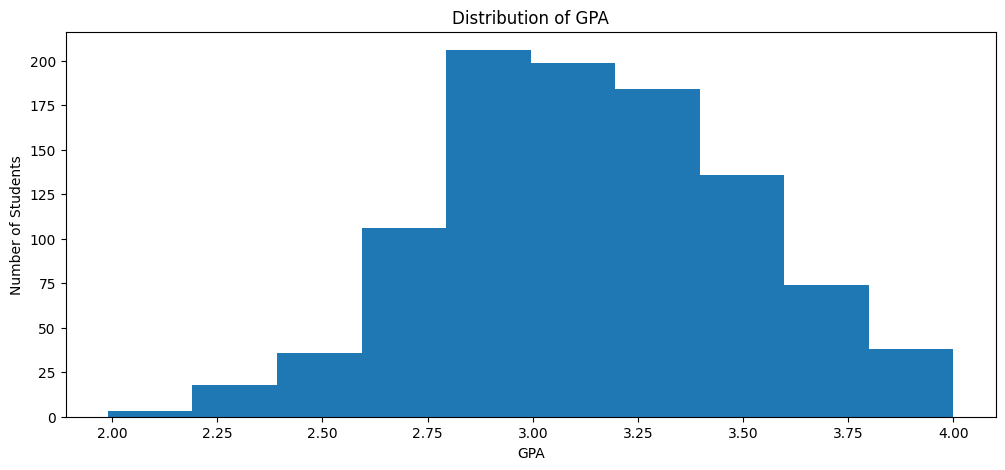

In [27]:
plt.figure(figsize=(12,5))
plt.hist(df['gpa'])
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.title('Distribution of GPA')

Text(0.5, 1.0, 'GPA vs Attendance')

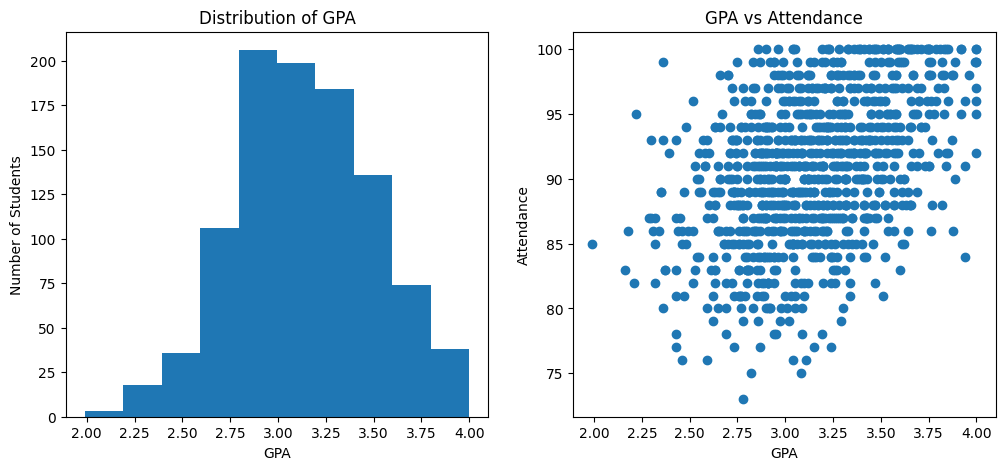

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['gpa'])
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.title('Distribution of GPA')

plt.subplot(1,2,2)
plt.scatter(df['gpa'], df['attendance'])
plt.xlabel('GPA')
plt.ylabel('Attendance')
plt.title('GPA vs Attendance')

In [31]:
dept_math = df.groupby('department')['math_score'].mean()
dept_math

,math_score
department,
Arts,69.188060
Commerce,78.765714
Science,88.463492


In [32]:
dept_science = df.groupby('department')['science_score'].mean()
dept_science

,science_score
department,
Arts,59.844776
Commerce,69.165714
Science,92.200000


In [33]:
dept_english = df.groupby('department')['english_score'].mean()
dept_english

,english_score
department,
Arts,89.158209
Commerce,79.222857
Science,78.885714


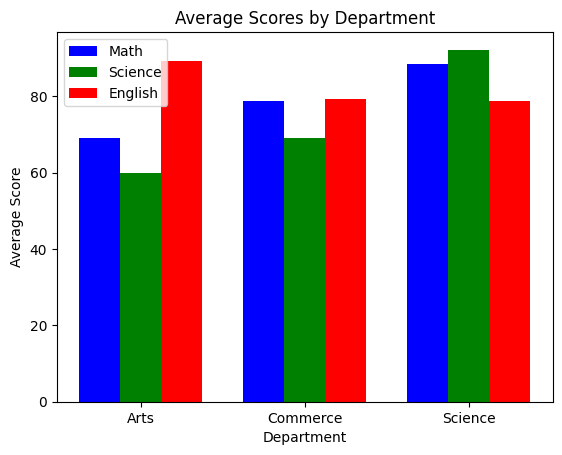

In [43]:
plt.figsize=(10,6)
x = range(len(dept_math))
width = 0.25

plt.bar(x, dept_math, width, label='Math', color='blue')
plt.bar([i + width for i in x], dept_science, width, label='Science', color='green')
plt.bar([i + width*2 for i in x], dept_english, width, label='English', color='red')

plt.title('Average Scores by Department')
plt.xlabel('Department')
plt.ylabel('Average Score')

plt.xticks([i + width for i in x], dept_math.index)
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

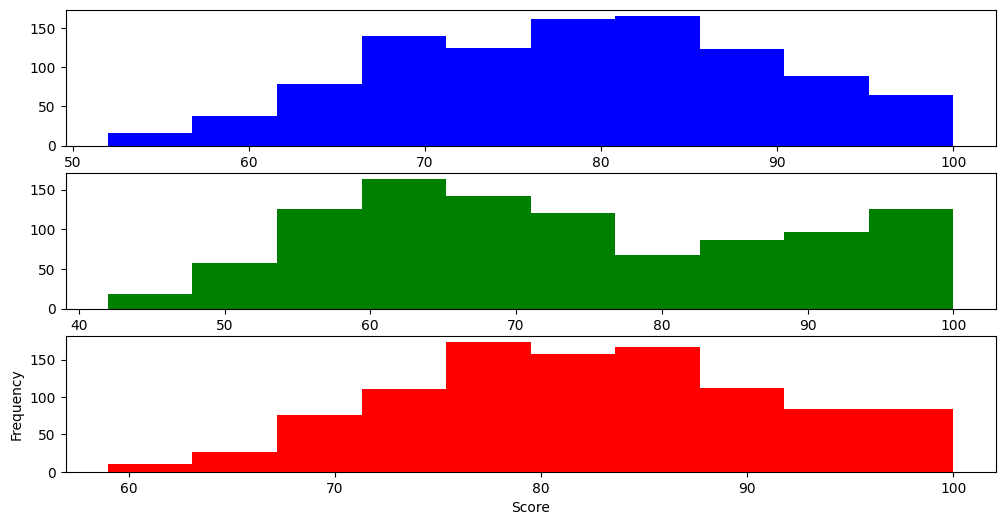

In [47]:
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.hist(df['math_score'], color= 'blue')
plt.subplot(3,1,2)
plt.hist(df['science_score'], color= 'green')
plt.subplot(3,1,3)
plt.hist(df['english_score'], color= 'red')

plt.xlabel('Score')
plt.ylabel('Frequency')

In [49]:
columns = ['gpa', 'attendance', 'study_hours', 'average_score']
columns

['gpa', 'attendance', 'study_hours', 'average_score']

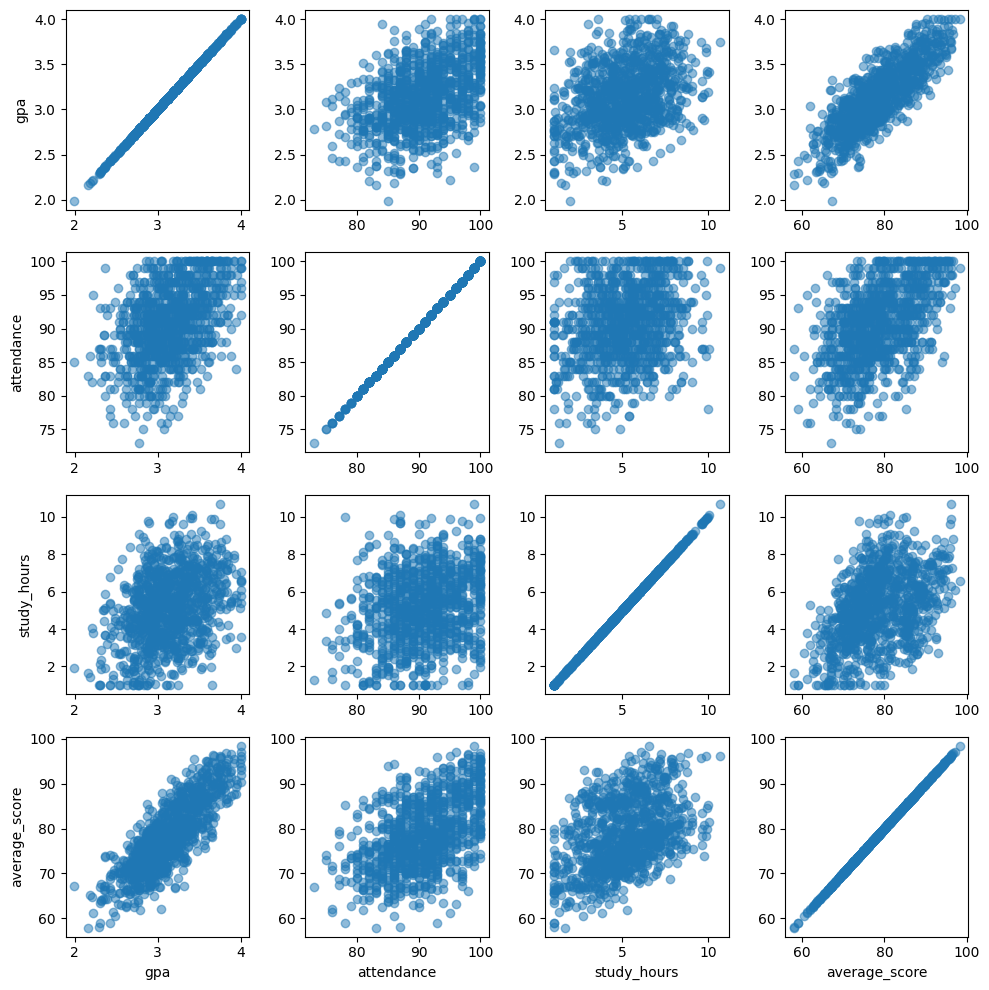

In [52]:
plt.figure(figsize=(10, 10))
for i in range(len(columns)):
    for j in range(len(columns)):
        plt.subplot(len(columns), len(columns), i*len(columns)+j+1)
        plt.scatter(df[columns[j]], df[columns[i]], alpha=0.5)
        if i == len(columns)-1:
            plt.xlabel(columns[j])
        if j == 0:
            plt.ylabel(columns[i])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Score')

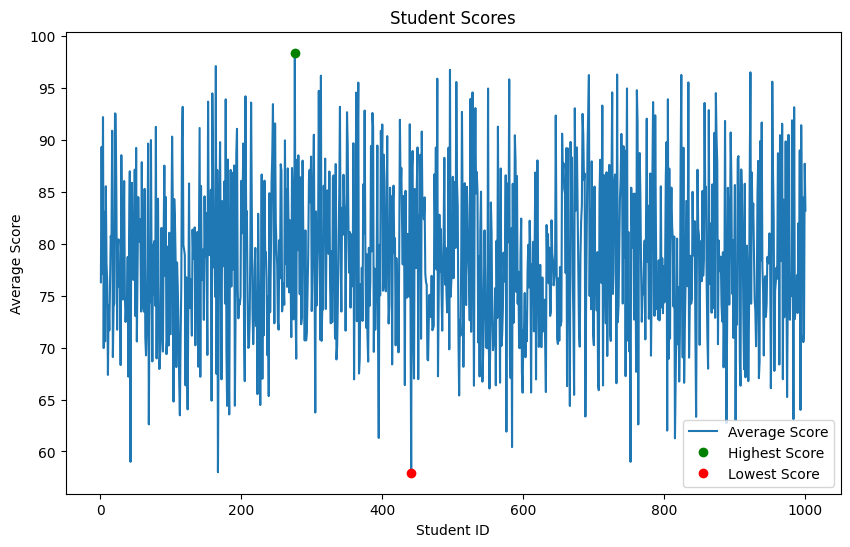

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df['student_id'], df['average_score' ], label='Average Score' )

max_score = df['average_score' ].max()
min_score = df['average_score' ].min()

plt.plot(df.loc[df['average_score'] == max_score, 'student_id'],
max_score, 'go', label='Highest Score' )
plt.plot(df.loc[df['average_score' ] == min_score, 'student_id'],
min_score, 'ro', label='Lowest Score')

plt.title('Student Scores' )
plt.legend()
plt.xlabel('Student ID' )
plt.ylabel('Average Score')

Text(0.5, 1.0, 'Distribution of GPA by Department')

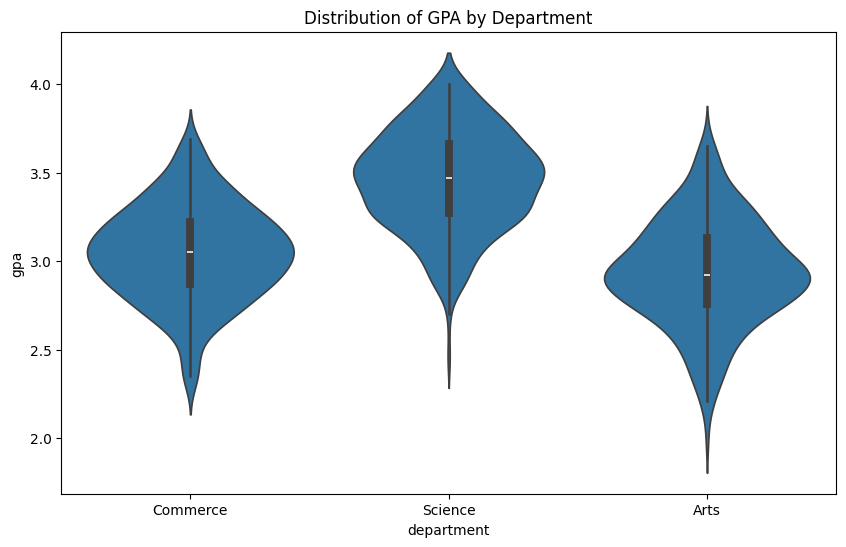

In [65]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='department', y='gpa')
plt.title('Distribution of GPA by Department')

In [69]:
numeric_cols = ['gpa', 'attendance', 'study_hours', 'average_score']
corr = df[numeric_cols].corr()
corr

,gpa,attendance,study_hours,average_score
gpa,1.000000,0.427939,0.358222,0.828286
attendance,0.427939,1.000000,0.235035,0.497621
study_hours,0.358222,0.235035,1.000000,0.433532
average_score,0.828286,0.497621,0.433532,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

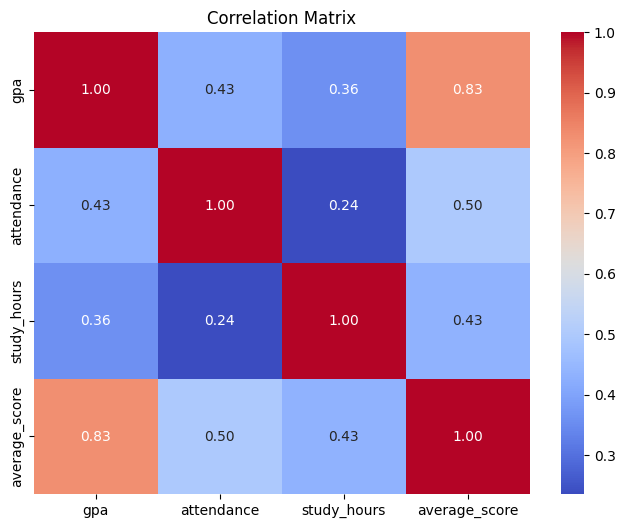

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

([0, 1, 2, 3],
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Excellent'),
  Text(2, 0, 'Average'),
  Text(3, 0, 'Needs improvement')])

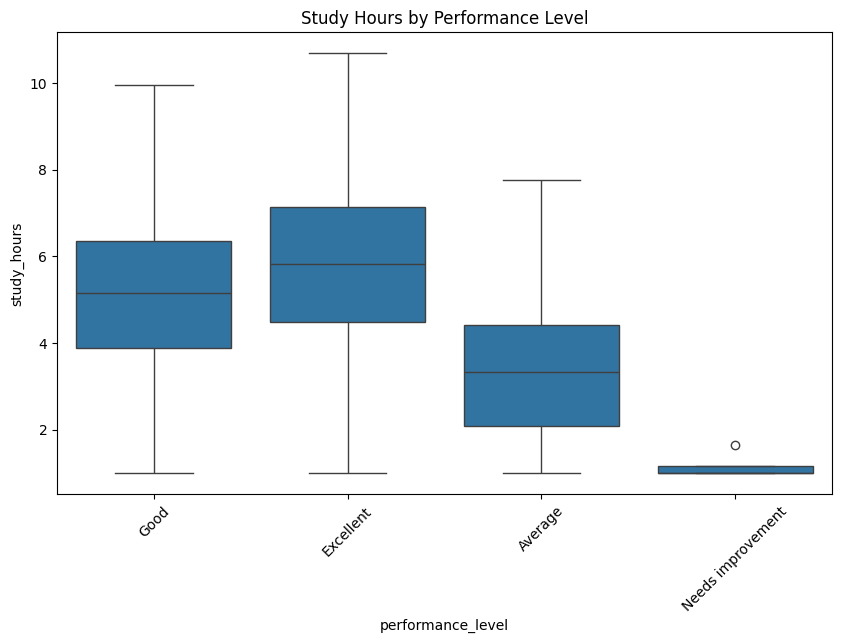

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='performance_level', y='study_hours')
plt.title('Study Hours by Performance Level')
plt.xticks(rotation=45)